# Part I

A.

In [1]:
import pandas as pd

In [2]:
eurohotels = pd.read_csv("euro_hotels.csv")
eurohotels.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


B.

In [3]:
eurohotels.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

Categorical:
'Gender'
'purpose_of_travel'
'Type of Travel'
'Type Of Booking'
'satisfaction'

Numerical:
'Age'
'Hotel wifi service'
'Departure/Arrival  convenience'
'Ease of Online booking'
'Hotel location'
'Food and drink'
'Stay comfort'
'Common Room entertainment'
'Checkin/Checkout service'
'Other service'
'Cleanliness'

C. There are 58,879 entries that were neutral or dissatisfied. There are 45,025 entries that are satisfied. These two response make up 57% and 43% of the data respectively.

In [4]:
eurohotels['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [5]:
total = eurohotels['satisfaction'].value_counts()[0] + eurohotels['satisfaction'].value_counts()[1]
print(f"neutral or dissatisfied: {eurohotels['satisfaction'].value_counts()[0]/total}")
print(f"satisfied: {eurohotels['satisfaction'].value_counts()[1]/total}")

neutral or dissatisfied: 0.5666673082845703
satisfied: 0.43333269171542965


D.

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
le.fit(eurohotels['satisfaction'])
list(le.classes_)

['neutral or dissatisfied', 'satisfied']

In [8]:
satisfaction = le.transform(eurohotels['satisfaction'])
eurohotels['satisfaction'] = satisfaction

In [9]:
eurohotels.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,0
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,0
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,1
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,0
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,1


Looking at the satisfaction column, they've all been converted to either 0s or 1s which correspond to neutral/dissatisfied and satisfied respectively

E.

You do not need to dummify the categorical variables to make an accurate model. However, you will need to use the label encoder to transform them. I tried this method worked and it led to .83 accuracy.

Although not dummfying worked, I think it is better to do so. Dummifying the variables makes it easier to analyze which of the categorical responses had more weight when looking at the coefficients. Without dummifying it just shows "Type of Travel" having a high coefficient. I don't know what this means because "Type of Travel" isn't on any kind of scale. I want to know which category of travel had a high impact.

Below, this is dummifying the categorical variables

In [10]:
eurohotels2 = eurohotels.copy(deep = True)

eurohotels2 = pd.get_dummies(eurohotels2, 
                                  columns=['Gender', 'purpose_of_travel', 'Type of Travel','Type Of Booking'], 
                                  drop_first=True)
eurohotels2.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Cleanliness,satisfaction,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
0,70172,13,3,4,3,1,5,5,5,4,...,5,0,1,1,0,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
2,110028,26,2,2,2,2,5,5,5,4,...,5,1,0,0,0,0,1,0,0,0
3,24026,25,2,5,5,5,2,2,2,1,...,2,0,0,0,0,0,1,0,0,0
4,119299,61,3,3,3,3,4,5,3,3,...,3,1,1,1,0,0,0,0,0,0


I also tried standardizing the data to make the model more accurate. This did help with accuracy somewhat, however, it makes predicting on new entries like we do later in the assignment a nightmare. You'd have to add the entry back into the data set, restandardize, and then pull it back out to predict on it. I chose to just leave the variables non-standardized for ease of use.

F.

In [11]:
eurohotels2.columns

Index(['id', 'Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined'],
      dtype='object')

In [12]:
X = eurohotels2[['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined']]
y = satisfaction

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=426)

I chose to use my brithday as the data partition (April 26th)

G.

In [14]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/russelllaros/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

H. Now here you can see the two different model outputs, one with dummified categorical variables and one without

In [15]:
log_odds = logmodel.coef_[0]

pd.DataFrame(log_odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Hotel wifi service,0.590196
Common Room entertainment,0.450789
Checkin/Checkout service,0.293415
Stay comfort,0.193219
Cleanliness,0.111209
Other service,0.090231
Age,0.010493
Gender_Male,-0.020435
Ease of Online booking,-0.036433
Departure/Arrival convenience,-0.049552


The above coefficients tell a better story of the data. You can see which types of travel or types of bookings had more weight on the model. Apparently, people who traveled for personal reasons were likely to not be satisfied.

There is a strong relationship between the quality of the hotel wifi service and whether the respondent was satisfied or not. This makes a lot of sense. Many people today, whether they are traveling for leisure, business, or aviation, all want relaible and fast access to the internet.

I.

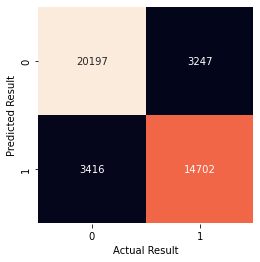

In [16]:
predictions = logmodel.predict(X_test)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(predictions, y_test)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.01 
b -= 0.01 
plt.ylim(a, b)
plt.show() 

accuracy:

In [17]:
acc = (mat[0][0] + mat[1][1])/mat.sum()
print("Accuracy:",acc)

sen = (mat[1][1])/(mat[1][1] + mat[0][1])
print("Sensitivity:",sen)

spe = (mat[0][0])/(mat[0][0] + mat[1][0])
print("Specificity:",spe)

pre = (mat[1][1])/(mat[1][0] + mat[1][1])
print("Precision:",pre)

print("Balanced Accuracy:",(sen + spe)/2)

Accuracy: 0.8396852894470911
Sensitivity: 0.8190985570226753
Specificity: 0.8553339262270783
Precision: 0.8114582183463959
Balanced Accuracy: 0.8372162416248767


J.

In [19]:
from sklearn import metrics
predictions2 = logmodel.predict(X_train)
print("Training Data Accuracy:",metrics.accuracy_score(y_train, predictions2))
print("Test Data Accuracy:",metrics.accuracy_score(y_test, predictions))

Training Data Accuracy: 0.8411023066311636
Test Data Accuracy: 0.8396852894470911


Comparing these two accruacy measures can show us if overfitting is happening. If their was a large discrepancy between the training and test accuracies it would mean the model overfit to the training data.

For this model it looks like it is not overfitting very bad (the training data is only 0.2%~ more accurate)

K.

In [20]:
eurohotels4 = eurohotels.copy(deep = True)
eurohotels4 = pd.get_dummies(eurohotels4, 
                                  columns=['Gender', 'purpose_of_travel', 'Type of Travel','Type Of Booking'], 
                                  drop_first=True)

In [28]:
sample = eurohotels4.sample(random_state=30)
sample

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Cleanliness,satisfaction,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
53891,34150,32,2,3,3,3,2,2,2,3,...,2,0,0,0,0,0,0,0,1,0


In [22]:
NewGuy = pd.DataFrame([{'Age':25, 'Hotel wifi service':1, 'Departure/Arrival  convenience':5,
                        'Ease of Online booking':5, 'Hotel location':5, 'Food and drink':5,
                        'Stay comfort':5, 'Common Room entertainment':5, 'Checkin/Checkout service':5,
                        'Other service':5, 'Cleanliness':5, 'Gender_Male':1,
                        'purpose_of_travel_aviation':0, 'purpose_of_travel_business':0,
                        'purpose_of_travel_personal':0, 'purpose_of_travel_tourism':1,
                        'Type of Travel_Personal Travel':0, 'Type Of Booking_Individual/Couple':1,
                        'Type Of Booking_Not defined':0}])

In [29]:
X2 = eurohotels4[['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined']]
y2 = satisfaction

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=426)

logmodel2 = LogisticRegression()
logmodel2.fit(X2_train, y2_train)

prediction = logmodel2.predict(NewGuy)
prediction

/Users/russelllaros/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0])

The made up person was not satisfied. I gave the model all 5s except for the wifi score, which I gave a 1. Go's to show how important a good wifi score is for satisfaction according to this data.

There is a 81% chance that the person is actually satisfied (precision)

In [30]:
pre

0.8114582183463959

L.

In [31]:
eurohotels4.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,Cleanliness,satisfaction,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,...,3.286351,0.433333,0.492541,0.133258,0.204400,0.091893,0.308487,0.310373,0.449886,0.072124
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,...,1.312273,0.495538,0.499947,0.339855,0.403265,0.288876,0.461871,0.462649,0.497485,0.258695
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
NewGuy2 = pd.DataFrame([{'Age':99, 'Hotel wifi service':-1, 'Departure/Arrival  convenience':6,
                        'Ease of Online booking':7, 'Hotel location':3, 'Food and drink':4,
                        'Stay comfort':0, 'Common Room entertainment':10, 'Checkin/Checkout service':7,
                        'Other service':0, 'Cleanliness':4, 'Gender_Male':1,
                        'purpose_of_travel_aviation':0, 'purpose_of_travel_business':0,
                        'purpose_of_travel_personal':0, 'purpose_of_travel_tourism':1,
                        'Type of Travel_Personal Travel':0, 'Type Of Booking_Individual/Couple':1,
                        'Type Of Booking_Not defined':0}])

In [33]:
prediction = logmodel2.predict(NewGuy2)
prediction

array([1])

For this new dataframe prediction I made a few of the numeric variables outside of the original data set ranges. I made age 99, when the highest age was 85, as well as making some of the rating variables outside of the range of 0-5. What's interesting is that I set the hotel wifi service as a -1, which you'd expect to make the model give a 0 prediction. However, with other rating variables extremely high and outside of the range, like common room entertainment being a 10, this offset the model and it predicted a satisfied outcome.

# Part II

M

In [34]:
eurohotels = pd.read_csv("euro_hotels.csv")
eurohotels.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [35]:
le.fit(eurohotels['satisfaction'])
satisfaction = le.transform(eurohotels['satisfaction'])
eurohotels['satisfaction'] = satisfaction

In [36]:
eurohotels = pd.get_dummies(eurohotels, 
                            columns=['Gender', 'purpose_of_travel', 'Type of Travel','Type Of Booking'])

N

In [37]:
X = eurohotels[['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined']]
y = satisfaction

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=426)

O

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [2,4,8],
    'max_features': [1,2,4,8],
    'min_samples_leaf': [1,2,4],
}

In [43]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2, 'n_estimators': 100}


In [45]:
clf=RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 8, min_samples_leaf = 2, random_state = 426)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_leaf=2,
                       random_state=426)

P

In [46]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
1,0.254001,Hotel wifi service
17,0.186478,Type Of Booking_Individual/Couple
16,0.161095,Type of Travel_Personal Travel
7,0.141485,Common Room entertainment
6,0.082202,Stay comfort
3,0.048232,Ease of Online booking
10,0.028151,Cleanliness
9,0.023895,Other service
8,0.021773,Checkin/Checkout service
0,0.014059,Age


Hotel wifi is still the largest predictor of satisfaction in the model, with types of booking and travel coming after that. This is slightly different from the log regression model. Wifi service was still the top in the model, but the other predictors were in a very different order.

Q

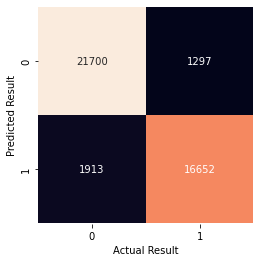

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(predictions, y_test)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.01 
b -= 0.01 
plt.ylim(a, b)
plt.show() 

In [48]:
acc = (mat[0][0] + mat[1][1])/mat.sum()
print("Accuracy:",acc)

sen = (mat[1][1])/(mat[1][1] + mat[0][1])
print("Sensitivity:",sen)

spe = (mat[0][0])/(mat[0][0] + mat[1][0])
print("Specificity:",spe)

pre = (mat[1][1])/(mat[1][0] + mat[1][1])
print("Precision:",pre)

print("Balanced Accuracy:",(sen + spe)/2)

Accuracy: 0.9227659881622636
Sensitivity: 0.9277397069474622
Specificity: 0.9189853047050354
Precision: 0.8969566388365203
Balanced Accuracy: 0.9233625058262488


R

In [49]:
from sklearn import metrics

predictions2 = clf.predict(X_train)

print("Training Data Accuracy:",metrics.accuracy_score(y_train, predictions2))
print("Test Data Accuracy:",metrics.accuracy_score(y_test, predictions))

Training Data Accuracy: 0.9248981425042507
Test Data Accuracy: 0.9227659881622636


The model has almost the exact same accuracy with the test and the training data. It's worth noting that when no tuning the hyperparameters down to what I did, the model had higher accuracy on the test data (about 95%) and very high accuracy on the training data (99%), which means the non-tuned model was overfitting, but this one is likely not.

S

In [50]:
prediction = clf.predict(NewGuy)
prediction

array([0])

The model does not think that the person will be satisfied. This falls in line with the log regression model prediction.

T

Lobsterland may want care about what kinds of predictions this model makes because there could be carry over between what features satisfy guests at european hotels and what features will satisfy guests of a lobsterland hotel. Many of the same features that were high predictors in the above models could also be predictors for lobsterland, but not in all cases. A high wifi score could matter a lot to a business person traveling for work who needs to set up zoom calls out of their room. It's probably not as high of a predictor for families that aren't spending a lot of time in the room because they're in the park all day. Potentially higher predictors could be variables like Common Room Entertainment, Stay Comfort, and Hotel Location, because guests want to relax and watch a movie after a long day in the park and they don't want to spend a lot of time going to and from the hotel. It might be smart to model data on theme park hotel surveys, if there is any.